# [연습문제] 서울시 청소년 정신 건강


[서울열린데이타광장](http://data.seoul.go.kr/dataList/datasetView.do?infId=10956&srvType=S&serviceKind=2) 사이트에서

엑셀파일을 다운받습니다.
<img src='./images/엑셀파일가져오기.PNG'/>

현재 디렉토리에 data 폴더에 저장한 후 저장한 엑셀파일명을 영문으로 수정하는 것을 권장합니다.

한글 파일명도 인식은 되지만 추후에 어떤 문제가 발생할 지도 모르기에 영문을 권장한다고 합니다.



### (1) 엑셀파일에서 데이타 가져오기

#### 1-1 우선 파일을 읽어서 출력

[출력결과]
<img src='./images/출력1.PNG'/>

In [1]:
# 여기에 코드
import pandas as pd

df = pd.read_excel('data/서울시청소년정신건강.xls')
df

,기간,구분,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,기간,구분,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2018,구분,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


### 1-2 엑셀에서 필요한 부분만 추출하자

* header=1  :  첫번째 행을 제목으로

* usecols : 해당컬럼

[출력결과]
<img src='./images/출력2.PNG'/>

In [2]:
# 여기에 코드
df = pd.read_excel('data/서울시청소년정신건강.xls', header=1, usecols='C:K')
df

,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


### 1-3 컬럼명을 지정하여 데이타 가져오기 (변수에 저장)

[출력결과]
<img src='./images/출력3.PNG'/>

In [3]:
# 컬럼이름을 지정
col_names = ['스트레스','스트레스남학생','스트레스여학생',
            '우을감경험률','우울남학생','우울여학생',
            '자살생각율','자살남학생','자살여학생']
df.columns = col_names
df
# 변수에 저장하기(raw_data)
# raw_data = df.values.tolist()
# raw_data = df.values
# # 여기에 코드
# raw_data

,스트레스,스트레스남학생,스트레스여학생,우을감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


### (2) 해당 데이타값의 반대값으로 행을 추가

예를 들어 스트레스를 받는다고 응답한 수가 42.7이면 

아니라고 응답한 수가 100 - 42.7= 57.3 이다.

각 항목에 반대로 응답한 수의 값을 행으로 추가한다

<img src='./images/출력4.PNG'>

In [4]:
# 반대의 데이타값을 가지는 행을 추가한다

# 여기에 코드
df.loc[1] = df.loc[0].apply( lambda x : 100 - x)
df

,스트레스,스트레스남학생,스트레스여학생,우을감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


### (3) 응답 컬럼을 추가

- 0번째 데이타는 '그렇다'
- 1번째 데이타는 '아니다'

[출력결과]
<img src='./images/출력5.PNG'/>

In [5]:
# 응답 컬럼으로 '그렇다'와 '아니다' 값을 추가
# 여기에 코드

df['응답'] = ['그렇다', '아니다']


# def res():
#     df['응답'] = '그렇다'
#     for x in range(len(df)):
#         if(x % 2 == 1):
#             df.loc[x]['응답'] = '아니다'

# df['응답'].apply( lambda x : res() )
df

,스트레스,스트레스남학생,스트레스여학생,우을감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생,응답
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2,그렇다
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8,아니다


### (4) 응답컬럼을 인덱스로 만든다

 - drop=True : 기존 인덱스 컬럼을 제거   
    
 - inplace=True : 현재 데이타프레임으로 대치되어 변수지정을 안해도 된다 
    
    
[출력결과]    
<img src='./images/출력6.PNG'/>    

In [6]:
# 여기에 코드
df.set_index('응답', inplace=True)
df

,스트레스,스트레스남학생,스트레스여학생,우을감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
아니다,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


# 시각화로 아래와 같이 출력하세요

[그래프 1]

<img src='./images/결과1.PNG'/>


---
[그래프 2]
<img src='./images/결과2.PNG'/>

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

# 폰트를 변경하면 '-' 기호가 네모로 변경되기에 '-'기호를 변경하지 않도록 설정
plt.rcParams['axes.unicode_minus'] = False

f_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

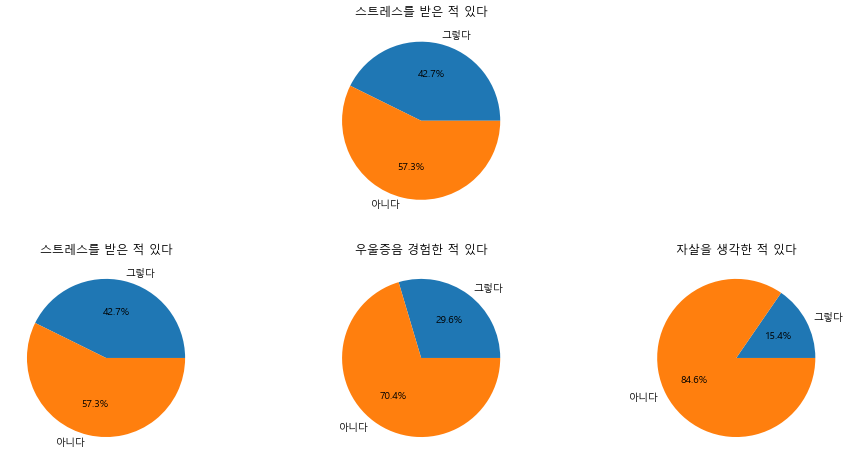

In [44]:
# 여기에 코드
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(234) 
ax2 = fig.add_subplot(235) 
ax3= fig.add_subplot(236) 

ax4 = fig.add_subplot(211)

# df['스트레스'].plot(kind='pie', autopct = '%1.1f%%', title = '스트레스를 받은 적 있다', subplots=True)
# df['우을감경험률'].plot(kind='pie', autopct = '%1.1f%%', title = '우울증음 경험한 적 있다', subplots=True)
# df['자살생각율'].plot(kind='pie', autopct = '%1.1f%%', title = '자살을 생각한 적 있다', subplots=True)

ax1.set_title('스트레스를 받은 적 있다')
ax1.pie(df['스트레스'], autopct = '%1.1f%%', labels=df.index);

ax2.set_title('우울증음 경험한 적 있다')
ax2.pie(df['우을감경험률'], autopct = '%1.1f%%', labels=df.index);

ax3.set_title('자살을 생각한 적 있다')
ax3.pie(df['자살생각율'], autopct = '%1.1f%%', labels=df.index);

ax4.set_title('스트레스를 받은 적 있다')
ax4.pie(df['스트레스'], autopct = '%1.1f%%', labels=df.index);